# The Boston Housing Prediction
In this notebook, we will apply basic machine learning concepts on data collected for housing prices in the Boston, Massachusetts area to predict the selling price of a new home.
We divided this into 3 sections:
* Exploration - we will first explore the data to obtain important features and descriptive statistics about the dataset.
* Data Preparation - we will properly split the data into testing and training subsets. We may need to scale or transform our features depending on what we will observed from our exploration phase.
* Prediction Modelling - Since we want to predict the value of the house, it means we are looking at a regression problem. In this section we will develop the tool and techniques necessary for our model to make predictions. We will then analyze the performance for a learning algorithm with varying parameters and training set sizes. This will enable us to pick the optimal model that best generalizes for unseen data. Finally, we will test this optimal model on a test sample and compare the predicted selling price to our statistics.

## Data Exploration

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Reading this [article](https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8), I was inclined to use the corrected boston dataset.
The corrected dataset can be found here. http://lib.stat.cmu.edu/datasets/boston_corrected.txt

The corrected Boston Housing Dataset has 506 rows and 20 columns. It contains the Harrison and Rubinfeld (1978) data corrected for a few minor errors and augmented with the latitude and longitude of the observations. Gilley and Pace also point out that MEDV is censored, in that median values at or over USD 50,000 are set to USD 50,000. The original data set without the corrections is also included in package mlbench as BostonHousing. In addition, a matrix of tract point coordinates projected to UTM zone 19 is included as boston.utm, and a sphere of influence neighbours list as boston.soi.

### Format
The data contains the following columns:

* TOWN a factor with levels given by town names
* TOWNNO a numeric vector corresponding to TOWN
* TRACT a numeric vector of tract ID numbers
* LON a numeric vector of tract point longitudes in decimal degrees
* LAT a numeric vector of tract point latitudes in decimal degrees
* MEDV a numeric vector of median values of owner-occupied housing in USD 1000
* CMEDV a numeric vector of corrected median values of owner-occupied housing in USD 1000
* CRIM a numeric vector of per capita crime
* ZN a numeric vector of proportions of residential land zoned for lots over 25000 sq. ft per town (constant for all Boston tracts)
* INDUS a numeric vector of proportions of non-retail business acres per town (constant for all Boston tracts)
* CHAS a factor with levels 1 if tract borders Charles River; 0 otherwise
* NOX a numeric vector of nitric oxides concentration (parts per 10 million) per town
* RM a numeric vector of average numbers of rooms per dwelling
* AGE a numeric vector of proportions of owner-occupied units built prior to 1940
* DIS a numeric vector of weighted distances to five Boston employment centres
* RAD a numeric vector of an index of accessibility to radial highways per town (constant for all Boston tracts)
* TAX a numeric vector full-value property-tax rate per USD 10,000 per town (constant for all Boston tracts)
* PTRATIO a numeric vector of pupil-teacher ratios per town (constant for all Boston tracts)
* B a numeric vector of 1000*(Bk - 0.63)^2 where Bk is the proportion of blacks
* LSTAT a numeric vector of percentage values of lower status population

In [4]:
import numpy as np 
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Load the dataset and sample some
#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#data = pd.read_csv('./data/boston_corrected', header=9, delimiter=r"\s+", names=column_names)
boston = pd.read_csv('../data/input/boston_corrected.txt', header=4, index_col='OBS.', delimiter="\t")
boston.head()

,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
OBS.,,,,,,,,,,,,,,,,,,,,
1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
# Dimension of the dataset
np.shape(boston)

(506, 20)

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TOWN#    506 non-null    int64  
 2   TRACT    506 non-null    int64  
 3   LON      506 non-null    float64
 4   LAT      506 non-null    float64
 5   MEDV     506 non-null    float64
 6   CMEDV    506 non-null    float64
 7   CRIM     506 non-null    float64
 8   ZN       506 non-null    float64
 9   INDUS    506 non-null    float64
 10  CHAS     506 non-null    int64  
 11  NOX      506 non-null    float64
 12  RM       506 non-null    float64
 13  AGE      506 non-null    float64
 14  DIS      506 non-null    float64
 15  RAD      506 non-null    int64  
 16  TAX      506 non-null    int64  
 17  PTRATIO  506 non-null    float64
 18  B        506 non-null    float64
 19  LSTAT    506 non-null    float64
dtypes: float64(14), int64(5), object(1)
memory usage: 83.0

In [7]:
boston.isnull().sum()

TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
boston.nunique()

TOWN        92
TOWN#       92
TRACT      506
LON        375
LAT        376
MEDV       229
CMEDV      228
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [9]:
# Let's summarize the data to see the distribution of data
boston.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
TOWN#,506.0,47.53,27.57,0.00,26.25,42.00,78.00,91.00
TRACT,506.0,2700.36,1380.04,1.00,1303.25,3393.50,3739.75,5082.00
LON,506.0,-71.06,0.08,-71.29,-71.09,-71.05,-71.02,-70.81
LAT,506.0,42.22,0.06,42.03,42.18,42.22,42.25,42.38
MEDV,506.0,22.53,9.20,5.00,17.02,21.20,25.00,50.00
CMEDV,506.0,22.53,9.18,5.00,17.02,21.20,25.00,50.00
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00


Interesting columns here are CHAS and ZN where both have 0 for 25th and 50th percentile. These results are expected knowing that both variables are categorical/conditional.

Another interesting information from this summary is our MEDV/CMEDV which we know beforehand that the price data was censored which means that they restrict the range of possible values. In this case, they decided to capped the maximum price variable to a median price of 50,000 USD, so no price can go beyond that value. Based on that, values  above 50.00 may not be usefull in predicting the Median value.

In [10]:
# Remove columns we're not interested in our analysis.

columns = ['TOWN', 'TOWN#', 'TRACT', 'LON','LAT', 'MEDV'] # we will remove medv since we'll be using the corrected medv value
data = boston.drop(labels = columns, axis = 1)

data.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
OBS.,,,,,,,,,,,,,,
1,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Let's get some data visualisation going...

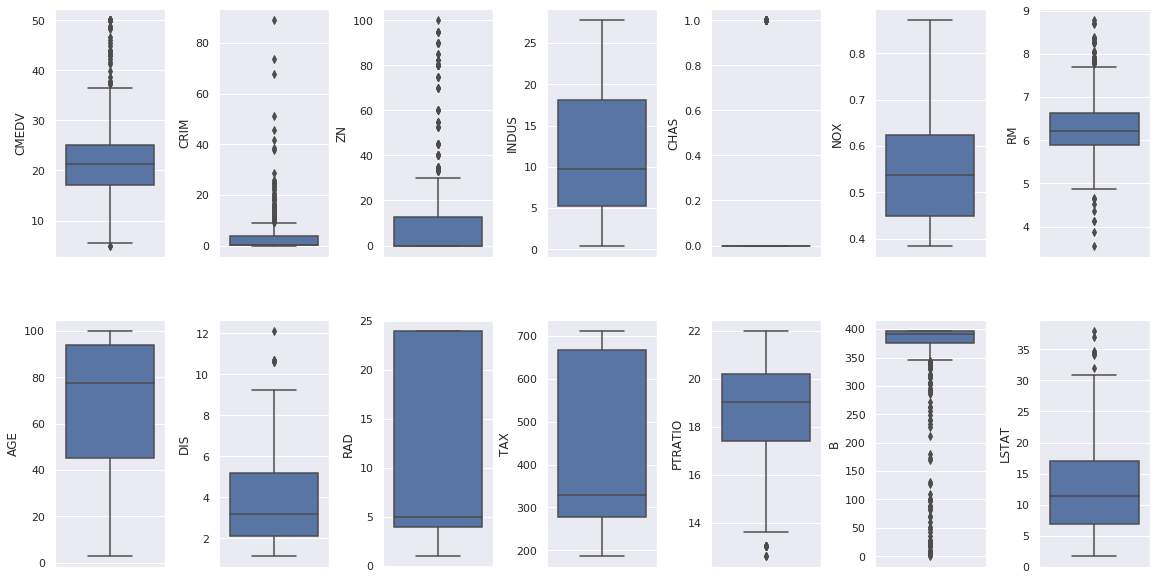

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 8))
index = 0
axs = axs.flatten()
for key, val in data.items():
    sns.boxplot(y=key, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We've already explained above the values for ZN and CHAS but columns like CRIM, RM and B have outliers. Let's look at the percentage of our outliers in each column.

In [12]:
print("Columns | Outliers %")
for key, val in data.items():
    q1 = val.quantile(0.25)
    q3 = val.quantile(0.75)
    iqr = q3 - q1 # Inner quartile range
    
    val_col = val[(val <= q1 - 1.5 * iqr) | (val >= q3 + 1.5 * iqr)]
    perc = np.shape(val_col)[0] * 100.0 / np.shape(data)[0]
    print("%s\t=> %.2f%%" % (key, perc))

Columns | Outliers %
CMEDV	=> 7.71%
CRIM	=> 13.04%
ZN	=> 13.44%
INDUS	=> 0.00%
CHAS	=> 100.00%
NOX	=> 0.00%
RM	=> 5.93%
AGE	=> 0.00%
DIS	=> 0.99%
RAD	=> 0.00%
TAX	=> 0.00%
PTRATIO	=> 2.96%
B	=> 15.22%
LSTAT	=> 1.38%


We'll remove CMEDV outliers (CMEDV = 50.0) because values with CMEDV >= 50 may not really represent the actual Median value because it is being censored. 

In [14]:
data = data[~(data.CMEDV >= 50.0)]
np.shape(data)

(490, 14)

Let's see how our features distribution looks like.

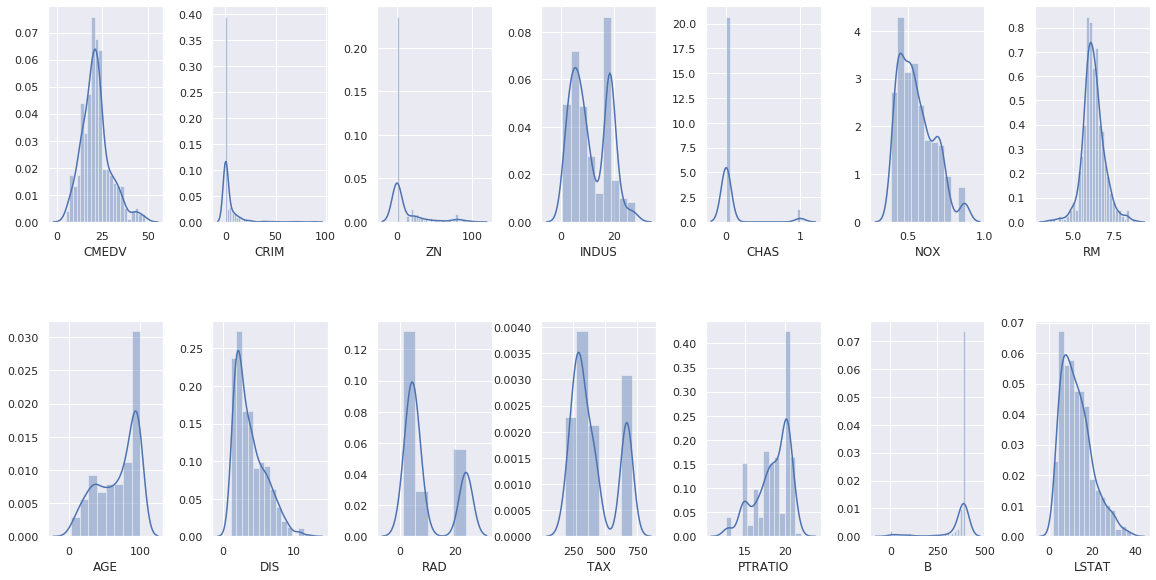

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 8))
index = 0
axs = axs.flatten()
for key, val in data.items():
    sns.distplot(val, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

CMEDV looks to have a normal distribution. CRIM, ZN and B have highly skewed distributions and other columns are either normal or bimodal in distribution.

We will now look at how our data are correlated.

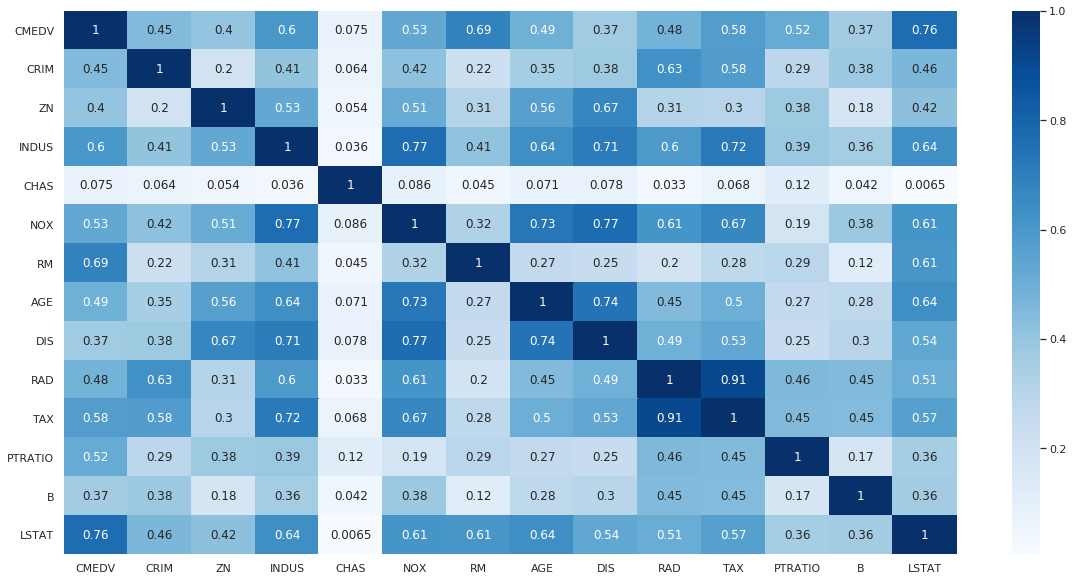

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True, cmap='Blues')

From the get-go we can see the RAD and TAX are highly correlated features. LSTAT, PTRATIO, TAX, AGE, RM, NOX, INDUS and CRIM looks like good indicators for predicting our target variable CMEDV.

## Data Preparation

We will prepare our data for modelling. First we select the features we wanted and transform/scale if necessary. Split them into training and test set.

In [125]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from scipy.stats import uniform, randint

features = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'RM', 'NOX', 'INDUS', 'CRIM']

In [64]:
X = data.loc[:,features].values
y = data['CMEDV'].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# Sanity check if splitting is correct
print('Training set dimensions:', X_train.shape, float(X_train.shape[0]) / float(X.shape[0]))
print('Test set dimensions:', X_test.shape, float(X_test.shape[0]) / float(X.shape[0]))

Training set dimensions: (392, 8) 0.8
Test set dimensions: (98, 8) 0.2


## Prediction Modelling

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [96]:
def performance_metrics(y_true, y_pred):
    rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 3)
    r2 = np.round(r2_score(y_true, y_pred), 3)
   
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    
    return (rmse, r2)

In [80]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [81]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("---")

In [139]:
# define an xgboost regression model using all default parameters
model = XGBRegressor()

In [140]:
# fit model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Model Evaluation

In [166]:
def model_performance(model):
    # model evaluation for training set
    y_train_pred = model.predict(X_train)

    print("The model performance for training set")
    rmse, r2 = performance_metrics(y_train, y_train_pred)
    
    # model evaluation for testing set
    y_test_pred = model.predict(X_test)

    print("The model performance for testing set")
    rmse, r2 = performance_metrics(y_test, y_test_pred)

In [167]:
model_performance(model)

The model performance for training set
--------------------------------------
RMSE is 0.014
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 2.642
R2 score is 0.874




### Cross-validation

In [143]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

scores = []

for train_index, test_index in kfold.split(X_train):   
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    xgb_model = XGBRegressor(objective="reg:squarederror", random_state=1234)
    xgb_model.fit(X_train_fold, y_train_fold)
    
    y_pred = xgb_model.predict(X_test_fold)
    
    scores.append(mean_squared_error(y_test_fold, y_pred))
    
display_scores(np.sqrt(scores))

Scores: [3.26283972 3.20593384 3.12555862 1.88417235 2.9431895 ]
Mean: 2.884
Std: 0.512


### Hyperparameter searching

In [206]:
xgb_model = XGBRegressor()

params = {
    "n_estimators": randint(100, 150), # default 100
    "max_depth": randint(2, 6), # default 3
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "gamma": uniform(0, 0.5),
    "subsample": uniform(0.6, 0.4) ,
    "colsample_bytree": uniform(0.7, 0.3)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=1234, n_iter=100, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model with rank: 1
Mean validation score: 0.754 (std: 0.044)
Parameters: {'colsample_bytree': 0.9727123619022005, 'gamma': 0.2911643386349342, 'learning_rate': 0.299649372075282, 'max_depth': 3, 'n_estimators': 105, 'subsample': 0.6313471119157875}



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   20.5s finished


In [211]:
search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9727123619022005,
             gamma=0.2911643386349342, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.299649372075282,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=105, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.6313471119157875,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [207]:
print(search.best_params_)

{'colsample_bytree': 0.9727123619022005, 'gamma': 0.2911643386349342, 'learning_rate': 0.299649372075282, 'max_depth': 3, 'n_estimators': 105, 'subsample': 0.6313471119157875}


In [208]:
model = search.best_estimator_
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9727123619022005,
             gamma=0.2911643386349342, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.299649372075282,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=105, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.6313471119157875,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [209]:
model_performance(model)

The model performance for training set
--------------------------------------
RMSE is 0.598
R2 score is 0.994


The model performance for testing set
--------------------------------------
RMSE is 3.042
R2 score is 0.833




In [210]:
model_performance(search)

The model performance for training set
--------------------------------------
RMSE is 0.598
R2 score is 0.994


The model performance for testing set
--------------------------------------
RMSE is 3.042
R2 score is 0.833




In [193]:
model_performance(search)

The model performance for training set
--------------------------------------
RMSE is 0.497
R2 score is 0.996


The model performance for testing set
--------------------------------------
RMSE is 2.649
R2 score is 0.874




In [191]:
xgb_model = XGBRegressor(colsample_bytree=0.963, gamma=0.369, learning_rate=0.142, max_depth=4, n_estimators=131, subsample=0.636)
xgb_model.fit(X_train, y_train, eval)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.963, gamma=0.369, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.142, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=131, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.636,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
model_performance(xgb_model)

The model performance for training set
--------------------------------------
RMSE is 0.495
R2 score is 0.996


The model performance for testing set
--------------------------------------
RMSE is 2.683
R2 score is 0.87




In [148]:
pd.reset_option('display.float_format')

In [155]:
xgb_model = XGBRegressor(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6],
                    'n_estimators': [50, 100, 200]}, verbose=1, n_jobs=1)

clf.fit(X_train, y_train)

# model evaluation for training set
y_train_pred = clf.predict(X_train)

print("The model performance for training set")
rmse, r2 = performance_metrics(y_train, y_train_pred)

# model evaluation for testing set
y_test_pred = clf.predict(X_test)

print("The model performance for testing set")
rmse, r2 = performance_metrics(y_test, y_test_pred)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The model performance for training set
--------------------------------------
RMSE is 0.176
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 2.715
R2 score is 0.867




[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.6s finished


In [156]:
print(clf.best_score_)
print(clf.best_params_)

0.6485381207535481
{'max_depth': 4, 'n_estimators': 100}


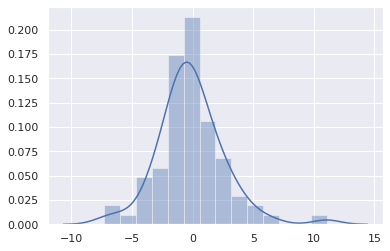

In [164]:
sns.distplot(y_test - y_test_pred)

## Further Improvement

From this stage we will iterate over our data to improve our model.

TypeError: float() argument must be a string or a number, not 'rv_frozen'

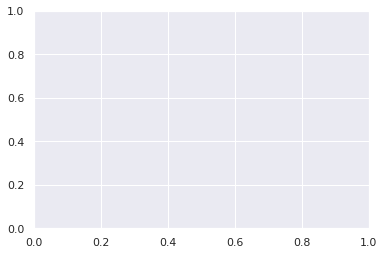

In [177]:
sns.distplot(uniform([0.7, 0.3, 100]))

In [179]:
uniform([0.7, 0.3, 10])

In [180]:
randint(100, 150)

In [183]:
uniform(0.7, 0.3).var()

0.007499999999999999

In [ ]:
import sys

sys.path.insert(0, '../code')

In [2]:
from predict_model import Predict
from make_dataset import DataPipeline

predict = Predict()

X, x, _, _ = DataPipeline().get_data()
x

array([[8.05000e+00, 1.86000e+01, 2.16000e+02, 5.95000e+01, 7.10400e+00,
        4.16100e-01, 1.38000e+00, 1.95100e-02],
       [9.42000e+00, 2.09000e+01, 3.84000e+02, 7.99000e+01, 6.72700e+00,
        5.20000e-01, 8.56000e+00, 1.48660e-01],
       [2.67700e+01, 2.02000e+01, 6.66000e+02, 1.00000e+02, 5.98700e+00,
        6.93000e-01, 1.81000e+01, 2.50461e+01],
       [1.05800e+01, 2.02000e+01, 6.66000e+02, 5.19000e+01, 6.31200e+00,
        5.83000e-01, 1.81000e+01, 3.67367e+00],
       [1.87100e+01, 2.02000e+01, 6.66000e+02, 9.41000e+01, 6.72800e+00,
        7.13000e-01, 1.81000e+01, 9.51363e+00],
       [7.60000e+00, 1.66000e+01, 2.93000e+02, 4.56000e+01, 6.31500e+00,
        4.05000e-01, 5.32000e+00, 4.59000e-02],
       [1.62100e+01, 1.78000e+01, 4.32000e+02, 9.29000e+01, 5.91300e+00,
        5.47000e-01, 1.00100e+01, 1.23290e-01],
       [1.80300e+01, 2.02000e+01, 6.66000e+02, 9.67000e+01, 6.18500e+00,
        6.14000e-01, 1.81000e+01, 1.02330e+01],
       [1.02400e+01, 1.61000e+01

In [5]:
import os
model_filepath = '../model/model.pkl'

if not os.path.exists('../model/model.pkl'):
    print('TRUE')

In [4]:
predict.model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8327987946877669,
             gamma=0.011071956801513627, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.11721856597656276,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=139, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8953147072058802,
             tree_method='exact', validate_parameters=1, verbosity=None)